# ATMOS 2022 - DMSP Analysis

-----------

## 0. Import Libraries

In [39]:
import matplotlib.pyplot as plt
import proplot

from data import *
from utils import *
from matplotlib.colors import BoundaryNorm
from visualization_codes import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Calculate Hight Light Fraction

In [3]:
# province names
provinces = ['istanbul', 'ankara', 'izmir']

# define land-use index correspondence of name
indexes = define_index_correspondence()
    
# years in data
years = np.arange(1992, 2014)

# define which land cover is used for the calculation
total_grid_use = np.arange(0, 64)
hight_light_grid_use = np.arange(50, 64)

Assuming that higher than 50 bit light data corresponds to urban areas

In [16]:
# calculation of relative high light intensity 
province_high_light_percent = {}
for province in provinces:
    
    # open specific province corine data
    dt = retrieve_dmsp(province)

    # find high intensity light percentages relative to total grid
    high_light_percent = {}
    for year in years:

        # find total grid amount in single year data
        total_grid_amount = find_grid_amount(dt,
                                             total_grid_use,
                                             year)

        # find urban grid amount in single year data
        high_light_grid_amount = find_grid_amount(dt,
                                             hight_light_grid_use,
                                             year)

        # calculate percent representation of urban LU relative to whole LU
        high_light_percent[year] = (high_light_grid_amount / total_grid_amount) * 100 
    
    province_high_light_percent[province] = high_light_percent

In [19]:
province_high_light_percent_df = pd.DataFrame(province_high_light_percent)

In [20]:
province_high_light_percent_df

,istanbul,ankara,izmir
1992,9.835146,1.384832,1.093986
1993,10.440731,1.251385,1.374219
1994,13.322866,1.495619,2.047855
1995,13.984524,1.702085,2.209528
1996,11.988337,1.659281,2.139470
1997,13.064932,1.291671,1.595171
1998,13.199507,1.576191,1.848459
1999,15.711562,1.626548,1.880793
2000,18.526410,2.135160,2.559819
2001,17.012448,1.704603,2.355033


In [21]:
# get the tranpose for easier plotting
province_high_light_percent_df_tpose = province_high_light_percent_df \
            .transpose()\
            .reset_index()\
            .rename(columns={'index': 'Province'})

In [22]:
province_high_light_percent_df_tpose

,Province,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,istanbul,9.835146,10.440731,13.322866,13.984524,11.988337,13.064932,13.199507,15.711562,18.526410,...,16.350791,14.489178,17.741393,21.677694,20.174947,20.488954,26.858809,22.911293,28.182124,27.318605
1,ankara,1.384832,1.251385,1.495619,1.702085,1.659281,1.291671,1.576191,1.626548,2.135160,...,1.900997,1.702085,2.480109,3.008863,3.031524,2.721825,3.970692,4.023567,4.786484,4.509518
2,izmir,1.093986,1.374219,2.047855,2.209528,2.139470,1.595171,1.848459,1.880793,2.559819,...,2.522095,2.037077,2.511317,3.599914,3.653805,3.190343,5.453762,5.254365,5.480707,5.771718


### 1.1 Plot High-Light Change

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/ui.py:406: ProPlotWarning: You specified both figsize=(6, 4) and axwidth=1.5. Ignoring 'axwidth'.
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xn

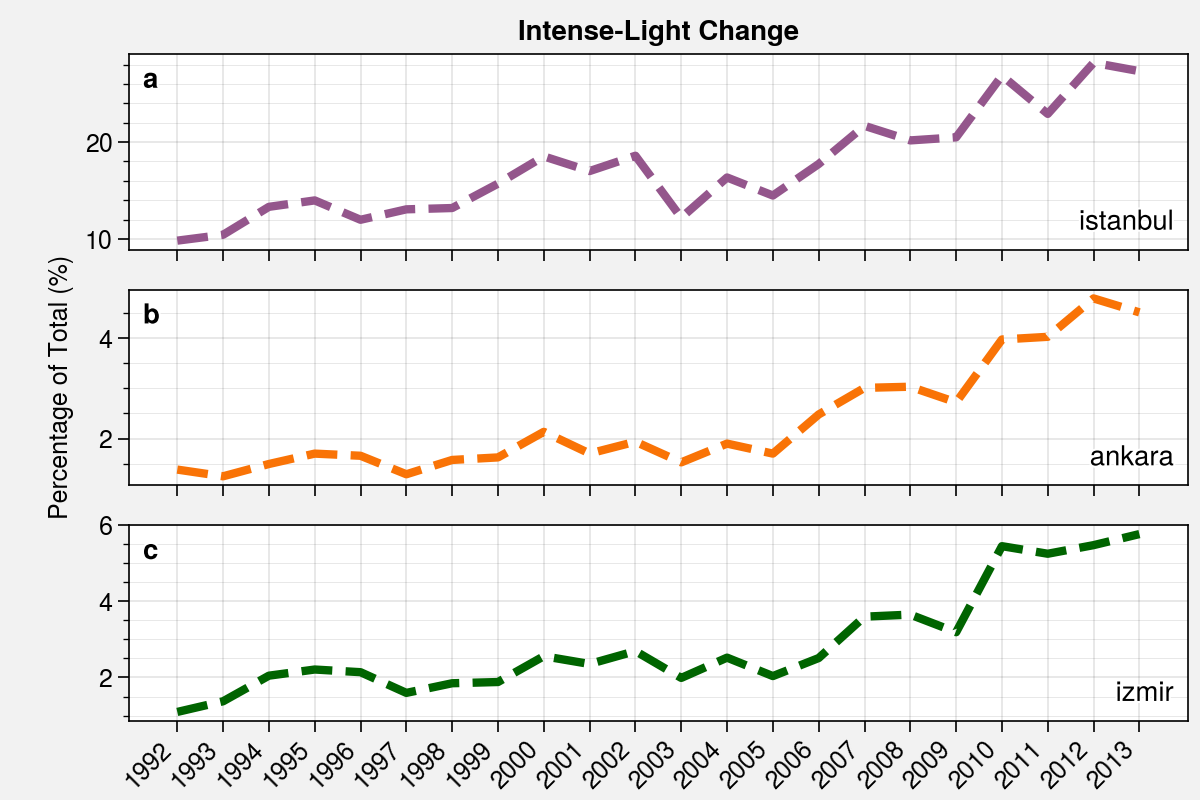

In [24]:
method = 'dmsp_lineplot'
suptitle='Intense-Light Change'
line_plot(province_high_light_percent_df_tpose, method, suptitle)

--------

## 2. Difference Between First and Last Light Image 

In [92]:
import cartopy
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import numpy as np
import proplot
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader


In [154]:
# calculation of relative high light intensity 
province_dif_percent = {}
for province in provinces:
    
    # open specific province corine data
    dt = retrieve_dmsp(province)
    
    # find the percent difference between the light magnitude
    # of the last and first image
    dif_percent = ((dt[-1] - dt[0]) / dt[0] * 10)
    province_dif_percent[province] = dif_percent

In [156]:
province_dif_percent[province].max()

<xarray.DataArray ()>
array(inf)
Coordinates:
    band         int64 1
    spatial_ref  int64 0
    time         int64 1992

### 2.1 Plot of Difference

create a function for this, later

Saved colormap to '/home/donmezk16/.proplot/cmaps/SciVisColorEven.json'.


/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be passed as keyword, not positionally.
  result = func(self, *args, **kwargs)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'progressive' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'progressive': ...} instead. If any parameter follows 'progressive', they should be passed as keyword, not positionally.
  result = func(self, *args, **kwargs)


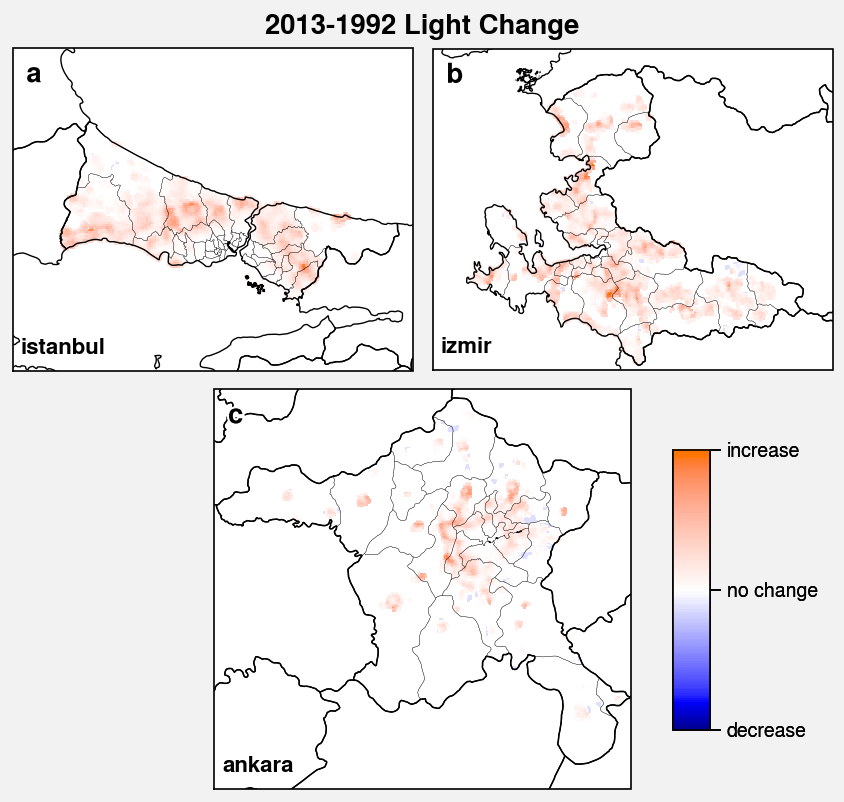

In [203]:
# Parameters to change (plot) -------------------
suptitle = '2013-1992 Light Change'
#cmap = plt.get_cmap('bwr')
cmap = proplot.Colormap(
    'darkblue_r', 'orange',
    name='SciVisColorEven', save=True
)
vmin = -80 # consider lower limit above
vmax = 80 # consider upper limit above
norm_inc = 1 # norm increment
ticks_inc = 80 # ticks increment

norm = BoundaryNorm(np.arange(vmin, vmax+norm_inc, norm_inc), ncolors=cmap.N, clip=True)
ticks = np.arange(vmin, vmax+ticks_inc, ticks_inc)
# -----------------------

# data
data_df = province_dif_percent

# graphic features
fig_array = [[1,2],
             [3,3]
            ]
graphic_no = 3
method='dmsp_lightchange'
difference_method = '2013-1992'

##########################################################################################
# projection
#crs_data = cartopy.crs.CRS(data_df.rio.crs.to_proj4())

# Create Figure -------------------------
fig, axs = proplot.subplots(fig_array, 
                          aspect=4, axwidth=2, proj=cartopy.crs.Mercator(),
                          hratios=tuple(np.ones(len(fig_array), dtype=int)),
                          includepanels=True, hspace=-0.10, wspace=0.1)

# format whole figure
axs.format(
           suptitle=suptitle,
           abcloc='ul',
           abc=True,)

axs[1].format(lonlim=(26, 28.7), latlim=(37.8, 39.5), # izmir
              labels=False, longrid=False, latgrid = False) 
axs[0].format(lonlim=(27.7, 30), latlim=(40.5, 41.9), # istanbul
              labels=False, longrid=False, latgrid = False)
axs[2].format(lonlim=(30.8, 33.9), latlim=(38.5, 40.8), # ankara
              labels=False, longrid=False, latgrid = False)


# shapefiles
turkey_district_shape = r'data/shapefiles/istanbul_ankara_izmir_shapefile.shp'
shape_district_turkey = ShapelyFeature(Reader(turkey_district_shape).geometries(),
                                             cartopy.crs.PlateCarree(), facecolor='none',
                                             edgecolor = 'black', linewidth = 0.1, zorder = 0.3)

turkey_province_shape = r'data/shapefiles/Iller_HGK_6360_Kanun_Sonrasi.shp'
shape_province_turkey = ShapelyFeature(Reader(turkey_province_shape).geometries(),
                                             cartopy.crs.PlateCarree(), facecolor='none',
                                             edgecolor = 'black', linewidth = 0.5, zorder = 0.4)

for i in range(graphic_no):
    axs[i].add_feature(shape_district_turkey)
    axs[i].add_feature(shape_province_turkey)   
    
# plots
# graphic
for i, province in enumerate(['istanbul', 'izmir', 'ankara']):
    mesh = axs[i].pcolormesh(data_df[province]['x'], data_df[province]['y'],
                             data_df[province], cmap = cmap,
                             vmin = vmin, vmax = vmax, norm=norm,
                             zorder = 0.2)
    
    
# CBAR ----------------------
cbar = axs[2].colorbar(mesh, ticks=ticks, loc='r',
                    drawedges = False, shrink=0.7,
                    space = -0.8, aspect = 50, )
#cbar.outline.set_linewidth(1)
cbar.ax.tick_params(labelsize=7,)
cbar.set_ticks([])
#cbar.minorticks_off()
cbar.ax.get_children()[4].set_color('black')
cbar.solids.set_linewidth(1)
# cbar ticks
cbar.set_ticks(ticks)
cbar.ax.set_yticklabels([
                         'decrease',
                         'no change',
                         'increase',
                         ])

# TEXT
for i, province in enumerate(['istanbul', 'izmir', 'ankara']):
        
    axs[i].set_title(fr'{province}',
                      fontsize = 8, loc = 'left',
                      pad = -14, y = 0.01,
                      x=0.020, weight = 'bold',)


# savefig    
plt.savefig(fr'pictures/corine_{method}_fig.jpeg',
            bbox_inches='tight', optimize=False, 
            progressive=True, dpi=300)